<a href="https://colab.research.google.com/github/Alan-Cheong/IEEE_QW_2020/blob/master/Property_Valuation_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 0, Loss: 1.0394, Validation Loss: 1.0163
Epoch 0, Loss: 1.0209
Epoch 50, Loss: 0.1065, Validation Loss: 0.1157
Epoch 50, Loss: 0.1057
Epoch 100, Loss: 0.1001, Validation Loss: 0.1168
Epoch 100, Loss: 0.1005
Epoch 150, Loss: 0.0964, Validation Loss: 0.1183
Epoch 150, Loss: 0.0975
Epoch 200, Loss: 0.0932, Validation Loss: 0.1206
Epoch 200, Loss: 0.0948
Epoch 250, Loss: 0.0897, Validation Loss: 0.1241
Epoch 250, Loss: 0.0921
Epoch 300, Loss: 0.0858, Validation Loss: 0.1292
Epoch 300, Loss: 0.0895
Epoch 350, Loss: 0.0817, Validation Loss: 0.1326
Epoch 350, Loss: 0.0865
Epoch 400, Loss: 0.0778, Validation Loss: 0.1359
Epoch 400, Loss: 0.0835
Epoch 450, Loss: 0.0740, Validation Loss: 0.1416
Epoch 450, Loss: 0.0803


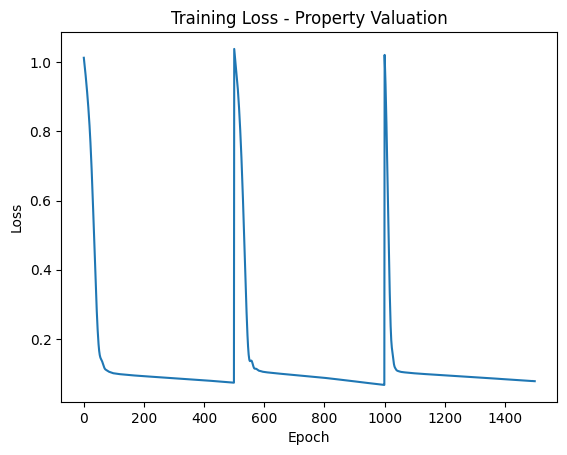

Predicted price for property: $494,484.22


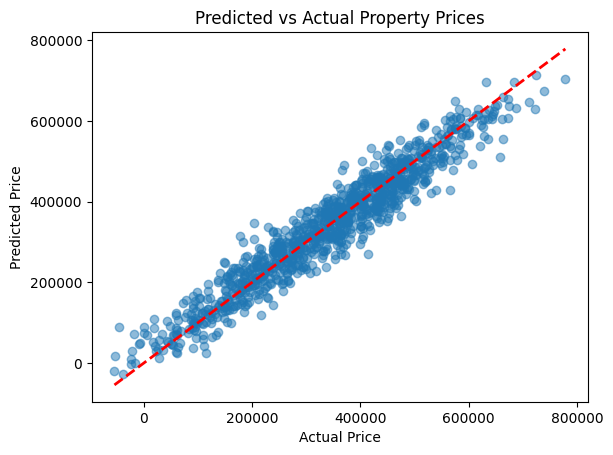

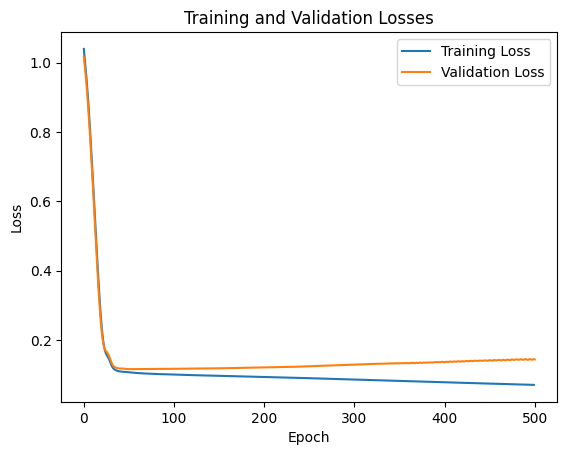

In [4]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)  # 20% for validation

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.FloatTensor(y_val)

# 1. Define a more suitable neural network for property valuation
class PropertyValuationModel(nn.Module):
    def __init__(self, input_size):
        super(PropertyValuationModel, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, 64),  # First hidden layer
            nn.ReLU(),
            nn.Linear(64, 32),          # Second hidden layer
            nn.ReLU(),
            nn.Linear(32, 16),          # Third hidden layer
            nn.ReLU(),
            nn.Linear(16, 1)            # Output layer (price)
        )

    def forward(self, x):
        return self.layers(x)

# 2. Prepare sample real estate data (replace with real data)
def generate_sample_data(n_samples=1000):
    # Example features: [square_feet, bedrooms, bathrooms, age, distance_to_city, lot_size, etc.]
    X = np.random.rand(n_samples, 6) * np.array([2000, 5, 4, 100, 20, 10000])  # Scale features
    # Simple price calculation (to be replaced with real data)
    y = (X[:, 0] * 200 + X[:, 1] * 50000 + X[:, 2] * 30000 - X[:, 3] * 1000 -
         X[:, 4] * 2000 + X[:, 5] * 5 + np.random.normal(0, 50000, n_samples))
    return X, y.reshape(-1, 1)

# 3. Data preprocessing
X, y = generate_sample_data()
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X_scaled)
y_tensor = torch.FloatTensor(y_scaled)

# 4. Initialize model, optimizer, and loss
input_size = X.shape[1]  # Number of features
model = PropertyValuationModel(input_size)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam often works better than SGD
loss_fn = nn.MSELoss()

# 5. Training loop
epochs = 500
train_losses = []
val_losses = []
for epoch in range(epochs):
    # Forward pass
    model.train()  # Set the model to training mode
    pred = model(X_train_tensor)  # Use training data
    loss = loss_fn(pred, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())  # Append to train_losses

    # Validation loss calculation
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        val_pred = model(X_val_tensor)
        val_loss = loss_fn(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())  # Append to val_losses

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')


    # Forward pass
    pred = model(X_tensor)
    loss = loss_fn(pred, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# 6. Visualization
plt.plot(losses)
plt.title("Training Loss - Property Valuation")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 7. Make a prediction on a new property
def predict_property_price(model, attributes, scaler_X, scaler_y):
    # Example attributes: [sqft, bedrooms, bathrooms, age, distance, lot_size]
    attr_scaled = scaler_X.transform([attributes])
    attr_tensor = torch.FloatTensor(attr_scaled)
    with torch.no_grad():
        pred_scaled = model(attr_tensor)
    pred_price = scaler_y.inverse_transform(pred_scaled.numpy())
    return pred_price[0][0]

# Test prediction
sample_property = [1500, 3, 2, 20, 5, 5000]  # Example property attributes
predicted_price = predict_property_price(model, sample_property, scaler_X, scaler_y)
print(f"Predicted price for property: ${predicted_price:,.2f}")

# 8. Plot predictions vs actual (for training data)
with torch.no_grad():
    predictions = model(X_tensor).numpy()
    predictions = scaler_y.inverse_transform(predictions)
    actual = scaler_y.inverse_transform(y_scaled)

plt.scatter(actual, predictions, alpha=0.5)
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', lw=2)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Property Prices")
plt.show()

# Validation loss calculation
with torch.no_grad():  # No need to calculate gradients for validation
        val_pred = model(X_val_tensor)
        val_loss = loss_fn(val_pred, y_val_tensor)
        val_losses.append(val_loss.item())

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.title("Training and Validation Losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
